In [47]:
import pandas as np
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [7]:
iris = load_iris()

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [8]:
X = pd.DataFrame(iris.data, columns=iris.feature_names)

In [9]:
X.shape

(150, 4)

In [10]:
X.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
63,6.1,2.9,4.7,1.4
127,6.1,3.0,4.9,1.8
86,6.7,3.1,4.7,1.5
55,5.7,2.8,4.5,1.3
77,6.7,3.0,5.0,1.7
71,6.1,2.8,4.0,1.3
128,6.4,2.8,5.6,2.1
97,6.2,2.9,4.3,1.3
30,4.8,3.1,1.6,0.2
26,5.0,3.4,1.6,0.4


In [21]:
y = iris.target

In [22]:
y.shape

(150,)

In [14]:
X.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

In [16]:
X.isnull().cumsum()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
145,0,0,0,0
146,0,0,0,0
147,0,0,0,0
148,0,0,0,0


In [17]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


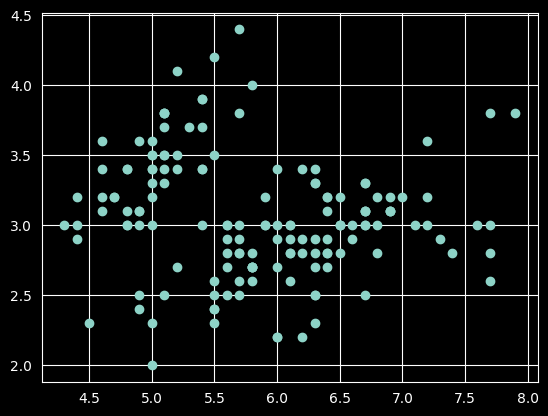

In [19]:
fig, ax = plt.subplots()

ax.scatter(X['sepal length (cm)'], X['sepal width (cm)'])
plt.show()

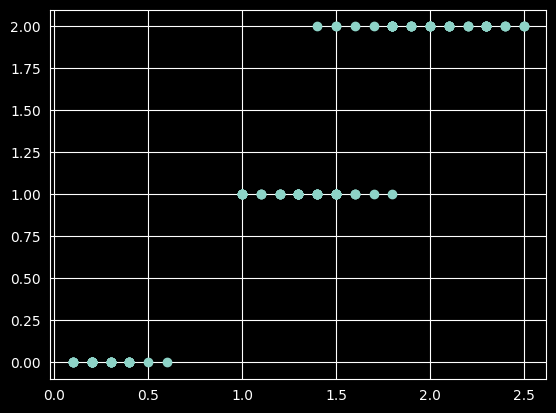

In [23]:
fig, ax = plt.subplots()

ax.scatter(X['petal width (cm)'], y)
plt.show()

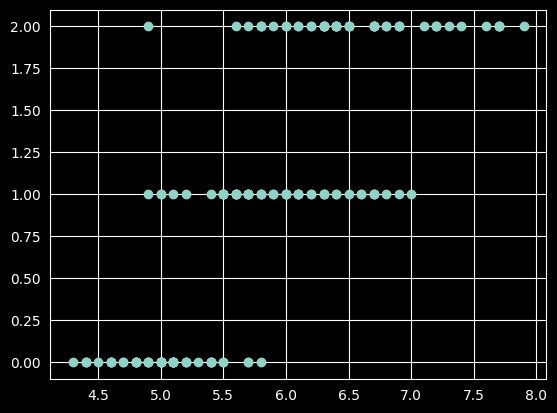

In [24]:
fig, ax = plt.subplots()

ax.scatter(X['sepal length (cm)'], y)
plt.show()

In [25]:
iris_corr = X.corr()

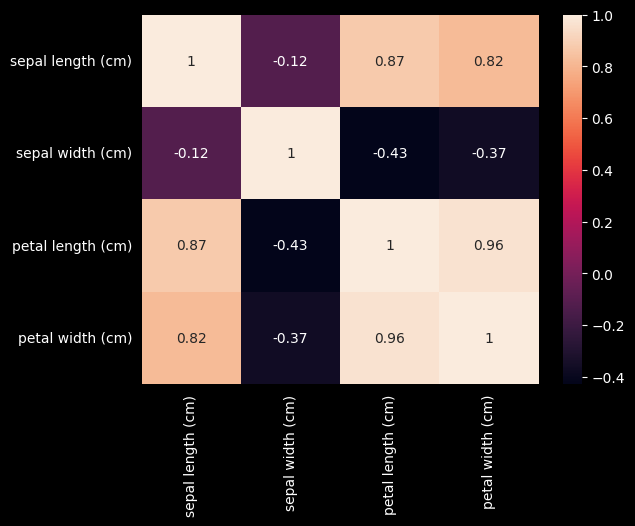

In [27]:
fig, ax = plt.subplots()
sns.heatmap(iris_corr, annot=True, ax=ax)

plt.show()

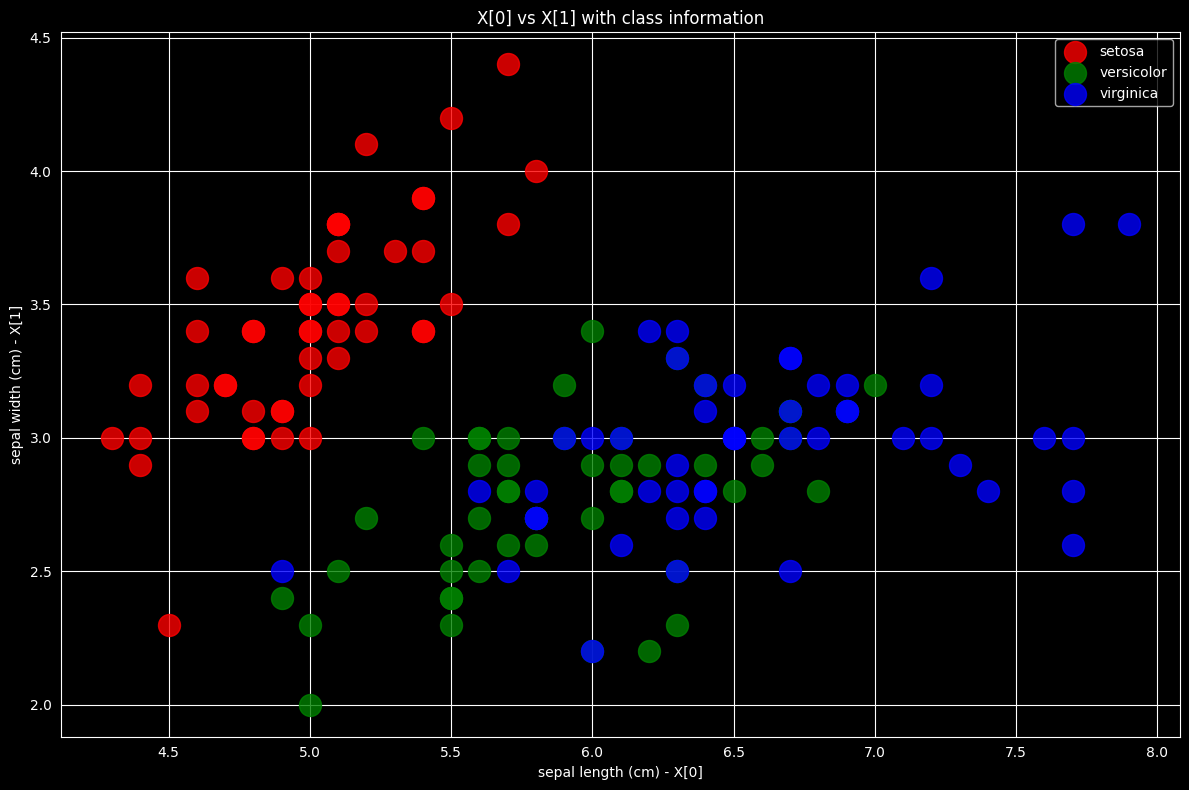

In [28]:
fig, ax = plt.subplots(figsize=(12, 8))

x = np.asarray(X)

colors = ['r', 'g', 'b']

for i, c, name in zip(range(len(iris.target_names)), colors, iris.target_names):
    ax.scatter(
        x[y == i, 0],
        x[y == i, 1],
        color=c,
        s=250,
        label=name,
        alpha=0.8
    )

ax.set_title('X[0] vs X[1] with class information')
ax.set_xlabel('sepal length (cm) - X[0]')
ax.set_ylabel('sepal width (cm) - X[1]')
ax.legend()

plt.tight_layout()
plt.show()

In [30]:
lda = LDA(n_components=2)

In [31]:
X_new = lda.fit_transform(X, y)

In [32]:
lda.explained_variance_ratio_

array([0.9912126, 0.0087874])

In [33]:
X_new.shape

(150, 2)

In [37]:
X_new_ = pd.DataFrame(X_new)

In [39]:
X_new_.head()

,0,1
0,8.061800,-0.300421
1,7.128688,0.786660
2,7.489828,0.265384
3,6.813201,0.670631
4,8.132309,-0.514463


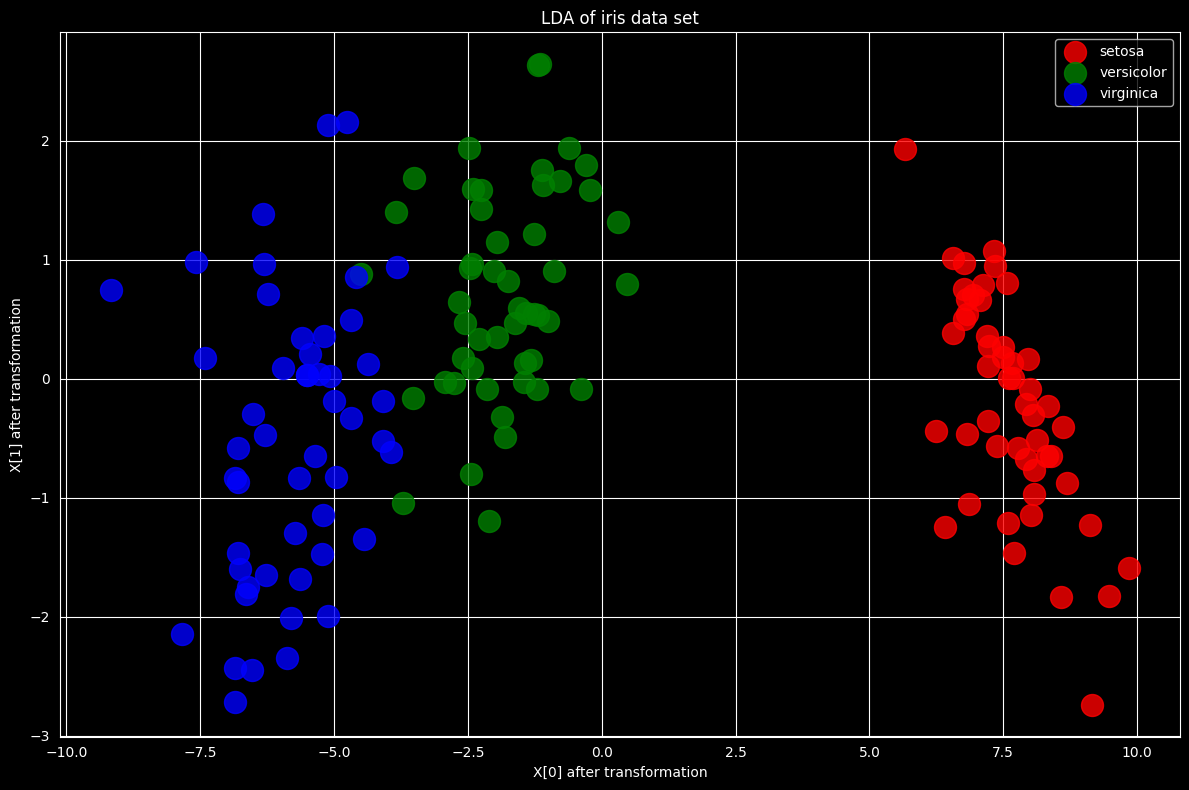

In [40]:
fig, ax = plt.subplots(figsize=(12, 8))

x = np.asarray(X_new_)

colors = ['r', 'g', 'b']

for i, c, name in zip(range(len(iris.target_names)), colors, iris.target_names):
    ax.scatter(
        x[y == i, 0],
        x[y == i, 1],
        color=c,
        s=250,
        label=name,
        alpha=0.8
    )

ax.set_title('LDA of iris data set')
ax.set_xlabel('X[0] after transformation')
ax.set_ylabel('X[1] after transformation')
ax.legend()

plt.tight_layout()
plt.show()

In [43]:
model = LogisticRegression(max_iter=1000)
model.fit(X, y)
model.score(X, y)

0.9733333333333334

In [45]:
model = LogisticRegression()
model.fit(X_new_, y)
model.score(X_new_, y)

0.98

In [49]:
model = LinearSVC()
model.fit(X_new_, y)
model.score(X_new_, y)


0.96